# Exploratory Data Analysis - LinkedIn Job Data

In [1]:
import pandas as pd 
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast
import re
import string
import math
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import spacy
#import matplotlib

In [5]:
df = pd.read_csv("/Users/laxmi/OneDrive/Desktop/660/LinkedIn_Job.csv") 
df.head()

,ID,Date,Company,Title,Location,Link,Job Description
0,3018037978,2022-03-17,"Neel-Schaffer, Inc.",Civil Engineer Intern III,"New Orleans, LA",https://www.linkedin.com/jobs/view/civil-engin...,"NEW ORLEANS, LA\n\nNeel-Schaffer is not just a..."
1,3009049013,2022-03-12,"PRIME AE Group, Inc.",Engineering Intern,"Harrisburg, PA",https://www.linkedin.com/jobs/view/engineering...,"PRIME AE Group, Inc. ( www.primeeng.com ), a m..."
2,3018954649,2022-03-17,Hanson Professional Services Inc.,Railway Engineering Internship 2022,"Washington, United States",https://www.linkedin.com/jobs/view/railway-eng...,Hanson Professional Services Inc. is a dynamic...
3,2888824258,2022-01-22,Eversource Energy,Transmission Cost & Performance Intern,"South Hadley, MA",https://www.linkedin.com/jobs/view/transmissio...,Check out this video and find out why our team...
4,2888818811,2022-01-22,Eversource Energy,Transmission Cost & Performance Intern,"Berlin, CT",https://www.linkedin.com/jobs/view/transmissio...,Check out this video and find out why our team...


In [6]:
df.shape

(100, 7)

In [7]:
df.isnull().sum()

ID                 0
Date               0
Company            0
Title              0
Location           0
Link               0
Job Description    0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isnull().sum()

ID                 0
Date               0
Company            0
Title              0
Location           0
Link               0
Job Description    0
dtype: int64

In [9]:
data['Job_des'] = data['Job Description']
df = data.drop('Job Description',axis =1)
df

,ID,Date,Company,Title,Location,Link,Job_des
0,3018037978,2022-03-17,"Neel-Schaffer, Inc.",Civil Engineer Intern III,"New Orleans, LA",https://www.linkedin.com/jobs/view/civil-engin...,"NEW ORLEANS, LA\n\nNeel-Schaffer is not just a..."
1,3009049013,2022-03-12,"PRIME AE Group, Inc.",Engineering Intern,"Harrisburg, PA",https://www.linkedin.com/jobs/view/engineering...,"PRIME AE Group, Inc. ( www.primeeng.com ), a m..."
2,3018954649,2022-03-17,Hanson Professional Services Inc.,Railway Engineering Internship 2022,"Washington, United States",https://www.linkedin.com/jobs/view/railway-eng...,Hanson Professional Services Inc. is a dynamic...
3,2888824258,2022-01-22,Eversource Energy,Transmission Cost & Performance Intern,"South Hadley, MA",https://www.linkedin.com/jobs/view/transmissio...,Check out this video and find out why our team...
4,2888818811,2022-01-22,Eversource Energy,Transmission Cost & Performance Intern,"Berlin, CT",https://www.linkedin.com/jobs/view/transmissio...,Check out this video and find out why our team...
...,...,...,...,...,...,...,...
95,3044390427,2022-03-31,ClearanceJobs,Software Engineer Intern- clearance eligibilit...,"Chantilly, VA",https://www.linkedin.com/jobs/view/software-en...,Bachelor's Degree (in the works) in Computer S...
96,None,2022-04-22,Zurn Water Solutions,Software Development Intern,"Milwaukee, WI",https://www.linkedin.com/jobs/view/software-de...,The .Net Software Developer Intern will help t...
97,3039326853,2022-04-25,insightsoftware,"Intern, Software Engineering","Raleigh, NC",https://www.linkedin.com/jobs/view/intern-soft...,"We’re looking for a talented, creative, and ea..."
98,3041024748,2022-03-29,Global Payments Inc.,Software Engineer Intern,"Chicago, IL",https://www.linkedin.com/jobs/view/software-en...,"Every day, Global Payments makes it possible f..."


In [10]:

df['Title'].unique()

array(['Civil Engineer Intern III', 'Engineering Intern',
       'Railway Engineering Internship 2022',
       'Transmission Cost & Performance Intern',
       'Software Engineer (C#, ASP.NET) Internship - Summer 2022',
       'Software Engineering Intern - Summer 2022 with Security Clearance',
       'Structural Engineering Intern (Summer 2022)',
       'Civil Engineering Internships',
       'Software Engineering Coop - Fall 2022',
       'Civil Engineering Student Internship - Traffic/Technology (Summer 2022)',
       'Summer Intern - 1030952 with Security Clearance',
       'Software Technical Marketing Engineering - Undergrad Intern',
       'Production Software Intern (Virtual), DreamWorks, Summer 2022',
       'Logistics Engineering Internship 2022',
       'Mechanical Engineering Intern',
       'Florida Infrastructure Civil Engineering Internship 2022',
       'Civil Engineer I', 'Civil Project Engineer',
       'Civil Design Engineer',
       'Civil / Sitework Engineering Int

In [11]:
df.columns

Index(['ID', 'Date', 'Company', 'Title', 'Location', 'Link', 'Job_des'], dtype='object')

<Figure size 864x576 with 0 Axes>

<BarContainer object of 47 artists>

Text(0.5, 1.0, 'Per Day count of Jobs added')

Text(0.5, 0, 'DATE')

Text(0, 0.5, 'COUNT')

([<matplotlib.axis.XTick at 0x204037a6e50>,
 [Text(0, 0, '2022-04-26'),
  Text(1, 0, '2022-03-17'),
  Text(2, 0, '2022-04-25'),
  Text(3, 0, '2022-03-13'),
  Text(4, 0, '2022-01-22'),
  Text(5, 0, '2022-03-18'),
  Text(6, 0, '2022-03-30'),
  Text(7, 0, '2022-04-16'),
  Text(8, 0, '2022-04-22'),
  Text(9, 0, '2022-04-08'),
  Text(10, 0, '2022-03-01'),
  Text(11, 0, '2022-01-11'),
  Text(12, 0, '2022-03-05'),
  Text(13, 0, '2022-04-13'),
  Text(14, 0, '2022-03-02'),
  Text(15, 0, '2022-03-10'),
  Text(16, 0, '2022-04-14'),
  Text(17, 0, '2022-02-25'),
  Text(18, 0, '2022-04-21'),
  Text(19, 0, '2022-01-10'),
  Text(20, 0, '2022-03-12'),
  Text(21, 0, '2022-01-19'),
  Text(22, 0, '2022-04-24'),
  Text(23, 0, '2022-01-04'),
  Text(24, 0, '2022-03-27'),
  Text(25, 0, '2022-04-05'),
  Text(26, 0, '2022-03-28'),
  Text(27, 0, '2022-04-01'),
  Text(28, 0, '2022-03-23'),
  Text(29, 0, '2022-02-01'),
  Text(30, 0, '2022-03-21'),
  Text(31, 0, '2022-01-28'),
  Text(32, 0, '2022-04-04'),
  Text(33

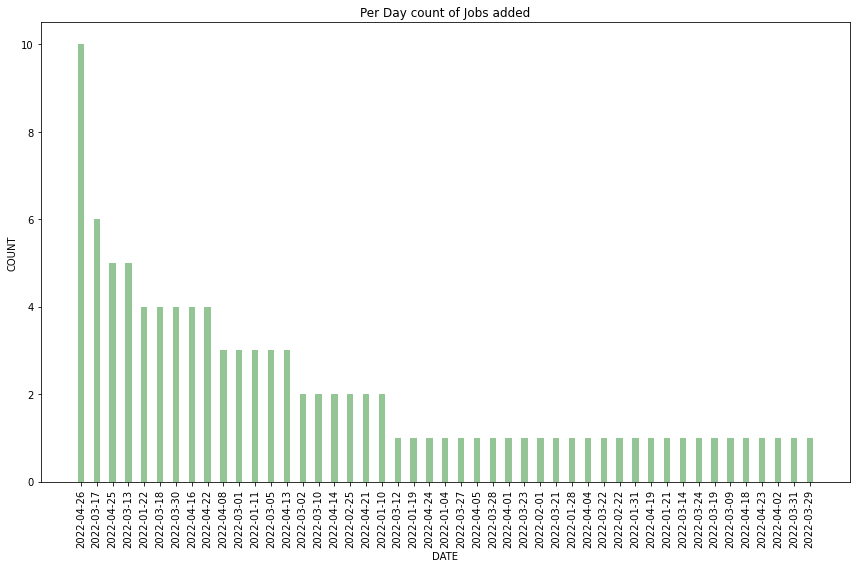

In [12]:
# Per day count of jobs added
dateList= []
for i in range(len(df["Date"])):
    dateList.append(df["Date"].iloc[i] )
dict0 = {i:dateList.count(i) for i in dateList}
sorted_date = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
word = [] 
frequency = []

for i in range(len(sorted_date)): 
    word.append(sorted_date[i][0]) 
    frequency.append(sorted_date[i][1])
    
indices = np.arange(len(sorted_date)) 
plt.figure(figsize=(12,8)) 
plt.bar(indices, frequency, color='#94c594',width=0.4) 
plt.title('Per Day count of Jobs added') 
plt.xlabel('DATE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='vertical') 
plt.tight_layout() 
plt.show()

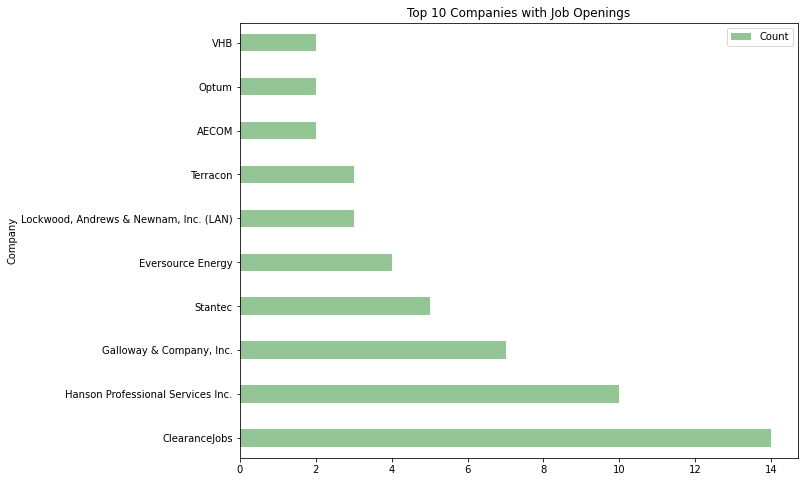

In [13]:
#bar graph of top 10 skills
skillList= []
for i in range(len(df["Company"])):
    skillList.append(df["Company"].iloc[i] )
dict0 = {i:skillList.count(i) for i in skillList}
sorted_skill = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
df_skills = pd.DataFrame(sorted_skill[:10], columns=['Company', 'Count'])
ax = df_skills.plot.barh(x='Company', y='Count',figsize=(10,8),width=0.4,color='#94c594', title = "Top 10 Companies with Job Openings")

<Figure size 648x504 with 0 Axes>

Text(0.5, 1.0, 'Correlation between feature columns')

<AxesSubplot:title={'center':'Correlation between feature columns'}>

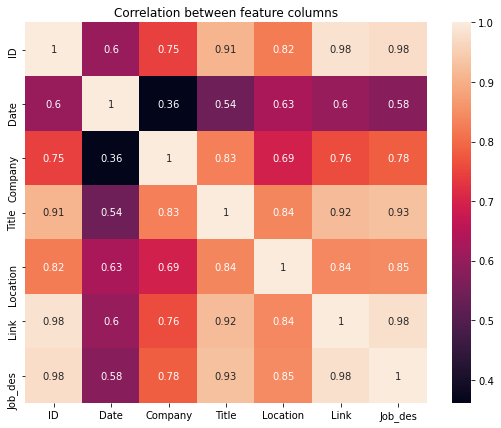

In [14]:
plt.figure(figsize=(9,7)) 
plt.title('Correlation between feature columns') 
corr = df.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr,annot = True )

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.cluster import KMeansClusterer, \
cosine_distance
tfidf_vect = TfidfVectorizer(stop_words="english",\
                             min_df=1)
dtm= tfidf_vect.fit_transform(data["Title"])

num_clusters=5

clusterer = KMeansClusterer(num_clusters, \
                            cosine_distance, \
                            repeats=30,avoid_empty_clusters = True)

# samples are assigned to cluster labels 
# starting from 0
clusters = clusterer.cluster(dtm.toarray(), \
                             assign_clusters=True )


print(clusters[0:25])

df['clusters'] = clusters

df.to_csv('data2_skills_min_df_5.csv')

[0, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 0, 0, 0, 2, 3]


In [16]:
import matplotlib.pyplot as plt
import numpy as np

data_eda = pd.read_csv("data2_skills_min_df_5.csv")
data_eda.head()

,Unnamed: 0,ID,Date,Company,Title,Location,Link,Job_des,clusters
0,0,3018037978,2022-03-17,"Neel-Schaffer, Inc.",Civil Engineer Intern III,"New Orleans, LA",https://www.linkedin.com/jobs/view/civil-engin...,"NEW ORLEANS, LA\n\nNeel-Schaffer is not just a...",0
1,1,3009049013,2022-03-12,"PRIME AE Group, Inc.",Engineering Intern,"Harrisburg, PA",https://www.linkedin.com/jobs/view/engineering...,"PRIME AE Group, Inc. ( www.primeeng.com ), a m...",2
2,2,3018954649,2022-03-17,Hanson Professional Services Inc.,Railway Engineering Internship 2022,"Washington, United States",https://www.linkedin.com/jobs/view/railway-eng...,Hanson Professional Services Inc. is a dynamic...,2
3,3,2888824258,2022-01-22,Eversource Energy,Transmission Cost & Performance Intern,"South Hadley, MA",https://www.linkedin.com/jobs/view/transmissio...,Check out this video and find out why our team...,2
4,4,2888818811,2022-01-22,Eversource Energy,Transmission Cost & Performance Intern,"Berlin, CT",https://www.linkedin.com/jobs/view/transmissio...,Check out this video and find out why our team...,2


In [18]:
cluster0List= []
cluster1List= []
cluster2List= []
cluster3List= []
cluster4List= []        

for i in range(len(df["Title"])):
    
    if df["clusters"][i]==0:
        
        cluster0List.append(df["Title"][i] )
    if df["clusters"][i]==1:
        
        cluster1List.append(df["Title"][i] )
    if df["clusters"][i]==2:
        
           cluster2List.append(df["Title"][i] )
    if df["clusters"][i]==3:
        
        cluster3List.append(df["Title"][i] )
    if df["clusters"][i]==4:
        
        cluster4List.append(df["Title"][i] )
        
dict0 = {i:cluster0List.count(i) for i in cluster0List}
dict1 = {i:cluster1List.count(i) for i in cluster1List}
dict2 = {i:cluster2List.count(i) for i in cluster2List}
dict3 = {i:cluster3List.count(i) for i in cluster3List}
dict4 = {i:cluster4List.count(i) for i in cluster4List}

sorted_0 = sorted(dict0.items(), key=lambda kv: kv[1], reverse = True)
sorted_1 = sorted(dict1.items(), key=lambda kv: kv[1], reverse = True)
sorted_2 = sorted(dict2.items(), key=lambda kv: kv[1], reverse = True)
sorted_3 = sorted(dict3.items(), key=lambda kv: kv[1], reverse = True)
sorted_4 = sorted(dict4.items(), key=lambda kv: kv[1], reverse = True)

print(sorted_0)
print(sorted_1)
print(sorted_2)
print(sorted_3)
print(sorted_4)


[('Civil Design Engineer', 4), ('Civil Project Engineer', 3), ('Civil Engineer I', 2), ('Engineer I EIT - Transportation Design (September Start)', 2), ('Civil Engineer', 2), ('Civil Engineer Intern III', 1), ('TRANSPORTATION GEOTECHNICAL STAFF ENGINEER EIT', 1), ('Engineer I EIT - Transportation Design (June Start)', 1), ('Geotechnical Field Engineer', 1), ('Civil/Structural Engineer (EIT)', 1), ('Engineer in Training (EIT)', 1), ('Internship - Data Engineer', 1), ('Materials Lab Field Engineer', 1), ('Staff Civil Engineer', 1), ('Staff Engineer', 1), ('Geotechnical Engineer in Training', 1), ('Engineer - Transportation Design', 1), ('Engineer', 1)]
[('Water Resources Specialist', 2), ('Software Engineering Coop - Fall 2022', 1), ('Software Technical Marketing Engineering - Undergrad Intern', 1), ('Water Resources Engineer in Training', 1)]
[('Transmission Cost & Performance Intern', 4), ('Civil Engineering Intern (Summer 2022)', 3), ('Software Engineering Intern', 3), ('Engineering I

[('Civil Design Engineer', 4), ('Civil Project Engineer', 3), ('Civil Engineer I', 2), ('Engineer I EIT - Transportation Design (September Start)', 2), ('Civil Engineer', 2)]


<Figure size 1224x360 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Cluster 1')

Text(0.5, 0, 'TITLE')

Text(0, 0.5, 'COUNT')

([<matplotlib.axis.XTick at 0x20406d94970>,
 [Text(0, 0, 'Civil Design Engineer'),
  Text(1, 0, 'Civil Project Engineer'),
  Text(2, 0, 'Civil Engineer I'),
  Text(3, 0, 'Engineer I EIT - Transportation Design (September Start)'),
  Text(4, 0, 'Civil Engineer')])

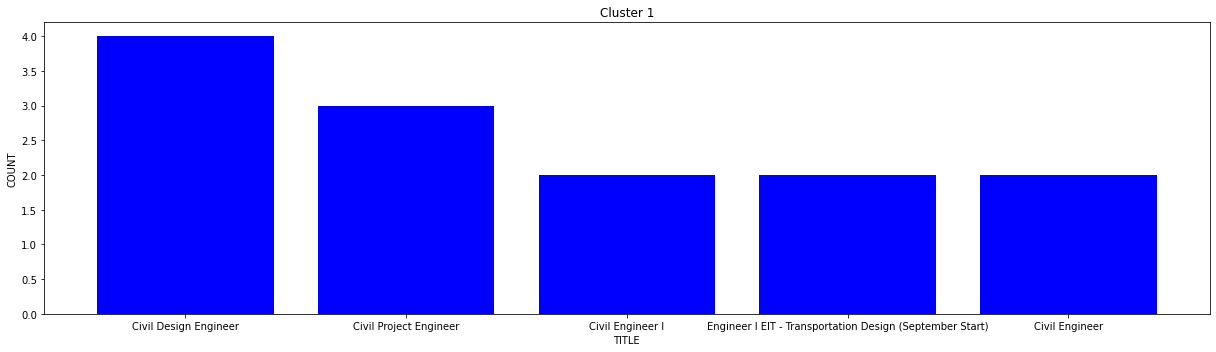

In [19]:
print(sorted_0[:5])

word = [] 
frequency = []

for i in range(len(sorted_0[:5])): 
    word.append(sorted_0[i][0]) 
    frequency.append(sorted_0[i][1])

indices = np.arange(len(sorted_0[:5])) 
plt.figure(figsize=(17,5)) 
plt.bar(indices, frequency, color='b') 
plt.title('Cluster 1') 
plt.xlabel('TITLE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='horizontal') 
plt.tight_layout() 
plt.show()

[('Water Resources Specialist', 2), ('Software Engineering Coop - Fall 2022', 1), ('Software Technical Marketing Engineering - Undergrad Intern', 1), ('Water Resources Engineer in Training', 1)]


<Figure size 1224x360 with 0 Axes>

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Cluster 2')

Text(0.5, 0, 'TITLE')

Text(0, 0.5, 'COUNT')

([<matplotlib.axis.XTick at 0x20406faaf70>,
 [Text(0, 0, 'Water Resources Specialist'),
  Text(1, 0, 'Software Engineering Coop - Fall 2022'),
  Text(2, 0, 'Software Technical Marketing Engineering - Undergrad Intern'),
  Text(3, 0, 'Water Resources Engineer in Training')])

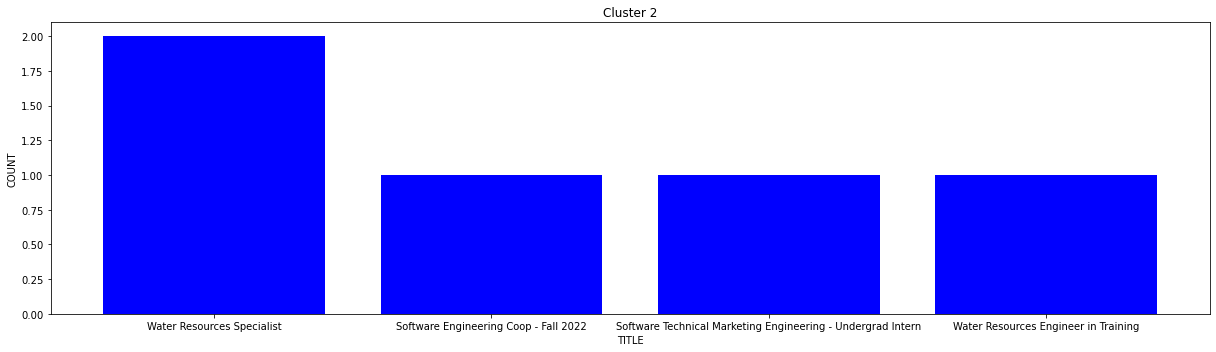

In [20]:
print(sorted_1[:5])

word = [] 
frequency = []

for i in range(len(sorted_1[:5])): 
    word.append(sorted_1[i][0]) 
    frequency.append(sorted_1[i][1])

indices = np.arange(len(sorted_1[:5])) 
plt.figure(figsize=(17,5)) 
plt.bar(indices, frequency, color='b') 
plt.title('Cluster 2') 
plt.xlabel('TITLE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='horizontal') 
plt.tight_layout() 
plt.show()

[('Transmission Cost & Performance Intern', 4), ('Civil Engineering Intern (Summer 2022)', 3), ('Software Engineering Intern', 3), ('Engineering Intern', 2), ('Structural Engineering Intern (Summer 2022)', 2)]


<Figure size 1224x360 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Cluster 3')

Text(0.5, 0, 'TITLE')

Text(0, 0.5, 'COUNT')

([<matplotlib.axis.XTick at 0x20406e06d00>,
 [Text(0, 0, 'Transmission Cost & Performance Intern'),
  Text(1, 0, 'Civil Engineering Intern (Summer 2022)'),
  Text(2, 0, 'Software Engineering Intern'),
  Text(3, 0, 'Engineering Intern'),
  Text(4, 0, 'Structural Engineering Intern (Summer 2022)')])

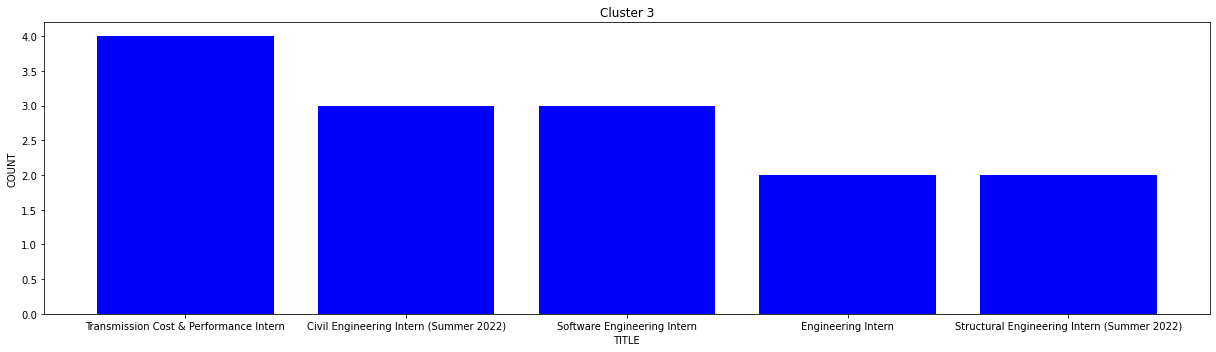

In [21]:
print(sorted_2[:5])

word = [] 
frequency = []

for i in range(len(sorted_2[:5])): 
    word.append(sorted_2[i][0]) 
    frequency.append(sorted_2[i][1])

indices = np.arange(len(sorted_2[:5])) 
plt.figure(figsize=(17,5)) 
plt.bar(indices, frequency, color='b') 
plt.title('Cluster 3') 
plt.xlabel('TITLE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='horizontal') 
plt.tight_layout() 
plt.show()

[('Software Engineer - Intern with Security Clearance', 2), ('Software Engineering Intern with Security Clearance', 2), ('Software Engineer Intern - La Crosse, WI', 2), ('Software Engineer Co-op', 2), ('Intern, Software Engineer - UI/UX', 2)]


<Figure size 1224x360 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Cluster 4')

Text(0.5, 0, 'TITLE')

Text(0, 0.5, 'COUNT')

([<matplotlib.axis.XTick at 0x20406e6d250>,
 [Text(0, 0, 'Software Engineer - Intern with Security Clearance'),
  Text(1, 0, 'Software Engineering Intern with Security Clearance'),
  Text(2, 0, 'Software Engineer Intern - La Crosse, WI'),
  Text(3, 0, 'Software Engineer Co-op'),
  Text(4, 0, 'Intern, Software Engineer - UI/UX')])

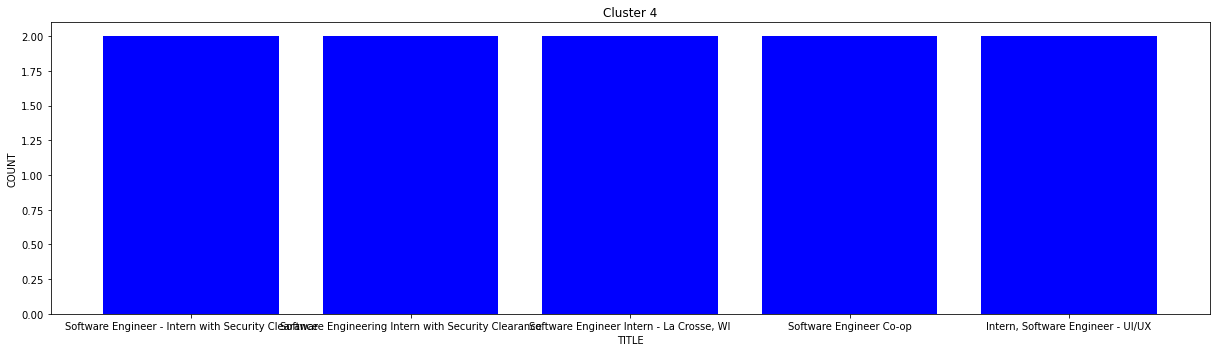

In [22]:
print(sorted_3[:5])

word = [] 
frequency = []

for i in range(len(sorted_3[:5])): 
    word.append(sorted_3[i][0]) 
    frequency.append(sorted_3[i][1])

indices = np.arange(len(sorted_3[:5])) 
plt.figure(figsize=(17,5)) 
plt.bar(indices, frequency, color='b') 
plt.title('Cluster 4') 
plt.xlabel('TITLE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='horizontal') 
plt.tight_layout() 
plt.show()

[('Entry-level Software Developer (Trainee) with Security Clearance', 2), ('Software Developer Intern', 2), ('Software Developer Intern with Security Clearance', 2), ('Summer 2022 Software Developer RPA Internship', 1), ('Entry Level Mechanical Engineer', 1)]


<Figure size 1224x360 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'Cluster 5')

Text(0.5, 0, 'TITLE')

Text(0, 0.5, 'COUNT')

([<matplotlib.axis.XTick at 0x20406ecf7c0>,
 [Text(0, 0, 'Entry-level Software Developer (Trainee) with Security Clearance'),
  Text(1, 0, 'Software Developer Intern'),
  Text(2, 0, 'Software Developer Intern with Security Clearance'),
  Text(3, 0, 'Summer 2022 Software Developer RPA Internship'),
  Text(4, 0, 'Entry Level Mechanical Engineer')])

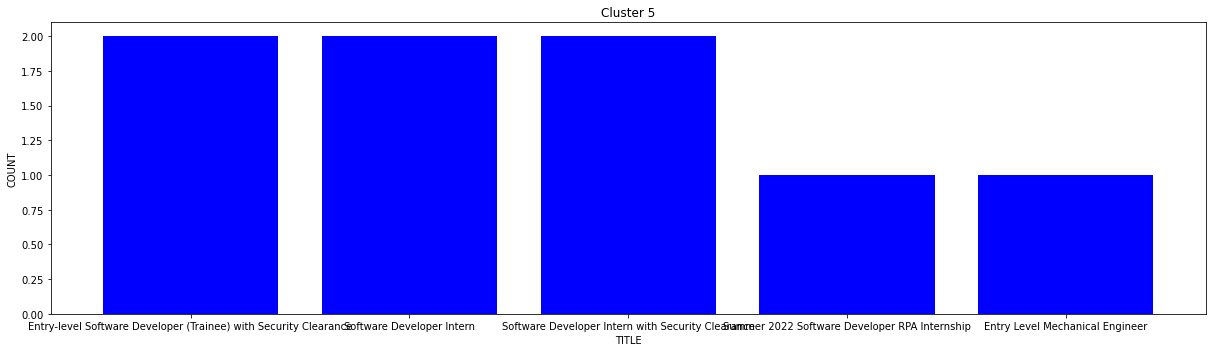

In [23]:
print(sorted_4[:5])

word = [] 
frequency = []

for i in range(len(sorted_4[:5])): 
    word.append(sorted_4[i][0]) 
    frequency.append(sorted_4[i][1])

indices = np.arange(len(sorted_4[:5])) 
plt.figure(figsize=(17,5)) 
plt.bar(indices, frequency, color='b') 
plt.title('Cluster 5') 
plt.xlabel('TITLE') 
plt.ylabel('COUNT') 
plt.xticks(indices, word, rotation='horizontal') 
plt.tight_layout() 
plt.show()

<Figure size 576x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

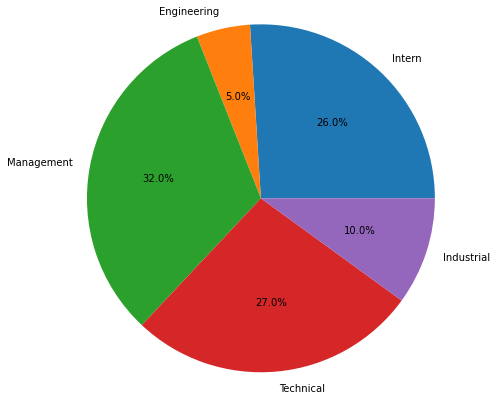

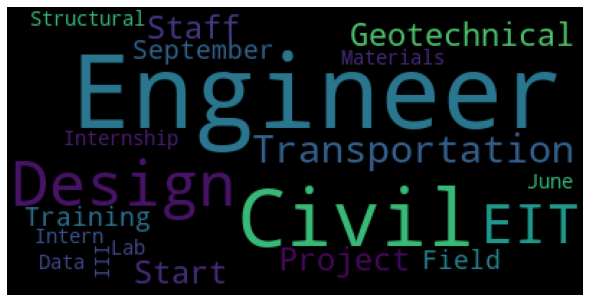

<Figure size 576x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

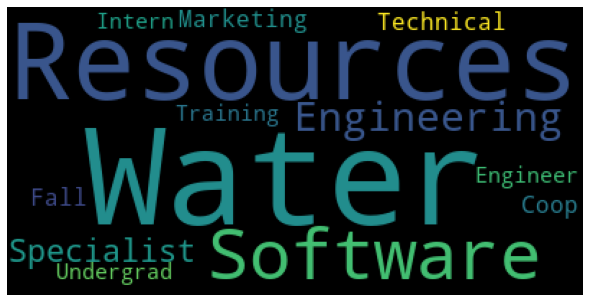

<Figure size 576x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

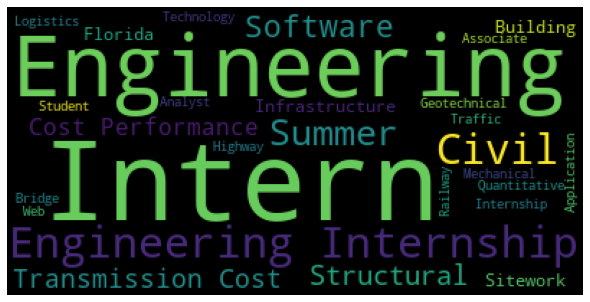

<Figure size 576x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

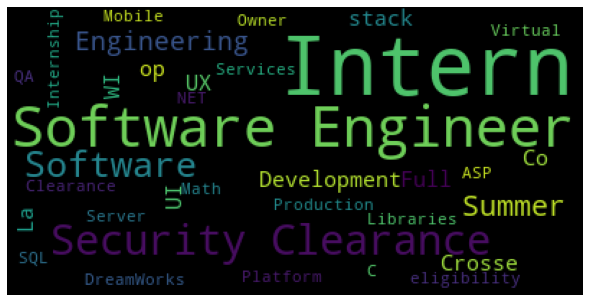

<Figure size 576x576 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

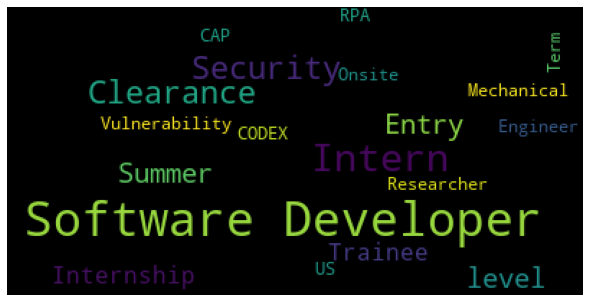

In [26]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
count_0 = [each for each in df['clusters'] if each==0]
count_1 = [each for each in df['clusters'] if each==1]
count_2 = [each for each in df['clusters'] if each==2]
count_3 = [each for each in df['clusters'] if each==3]
count_4 = [each for each in df['clusters'] if each==4]

data = [len(count_0),len(count_1),len(count_2),len(count_3),len(count_4)]

plot = plt.pie(data,labels=["Intern","Engineering","Management","Technical","Industrial"],autopct='%1.1f%%',radius=2)
cluster0Skills= ""
cluster1Skills= ""
cluster2Skills= ""
cluster3Skills= ""
cluster4Skills= ""
for i in range(len(df["Title"])):
    
    if df["clusters"][i]==0:
        
        cluster0Skills+=df["Title"][i] + " "
    if df["clusters"][i]==1:
        
        cluster1Skills+=df["Title"][i] + " "
    if df["clusters"][i]==2:
        
        cluster2Skills+=df["Title"][i] + " "
    if df["clusters"][i]==3:
        
        cluster3Skills+=df["Title"][i] + " "
    if df["clusters"][i]==4:
        
        cluster4Skills+=df["Title"][i] + " "
wordcloud = WordCloud().generate(cluster0Skills)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


wordcloud = WordCloud().generate(cluster1Skills)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


wordcloud = WordCloud().generate(cluster2Skills)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 



wordcloud = WordCloud().generate(cluster3Skills)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()





wordcloud = WordCloud().generate(cluster4Skills)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 

plt.tight_layout(pad = 0) 
  
plt.show()